In [ ]:
import pandas as pd
df = pd.read_csv('/content/FDI data (2).csv')
# Preview the data
print(df.head())


                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [ ]:
print(df.isnull().sum())

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


In [ ]:
# Calculate total FDI by sector
sector_wise_fdi = df.set_index('Sector').sum(axis=1)

# Display the sector-wise total investment
print(sector_wise_fdi)


Sector
METALLURGICAL INDUSTRIES                                                                                       10330.54
MINING                                                                                                          2271.83
POWER                                                                                                          11589.13
NON-CONVENTIONAL ENERGY                                                                                         5181.49
COAL PRODUCTION                                                                                                   27.74
                                                                                                                 ...   
PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)                                                            634.66
COIR                                                                                                               4.06
CONSTRUCTION (INFRASTRUCTURE) ACT

In [ ]:
year_wise_fdi = df.set_index('Sector').sum()
print(year_wise_fdi)

2000-01     2378.71
2001-02     4027.69
2002-03     2704.32
2003-04     2187.85
2004-05     3218.69
2005-06     5539.75
2006-07    12491.76
2007-08    24575.40
2008-09    31395.96
2009-10    25834.38
2010-11    21383.07
2011-12    35120.78
2012-13    22423.59
2013-14    24299.32
2014-15    30930.47
2015-16    40000.99
2016-17    43478.26
dtype: float64


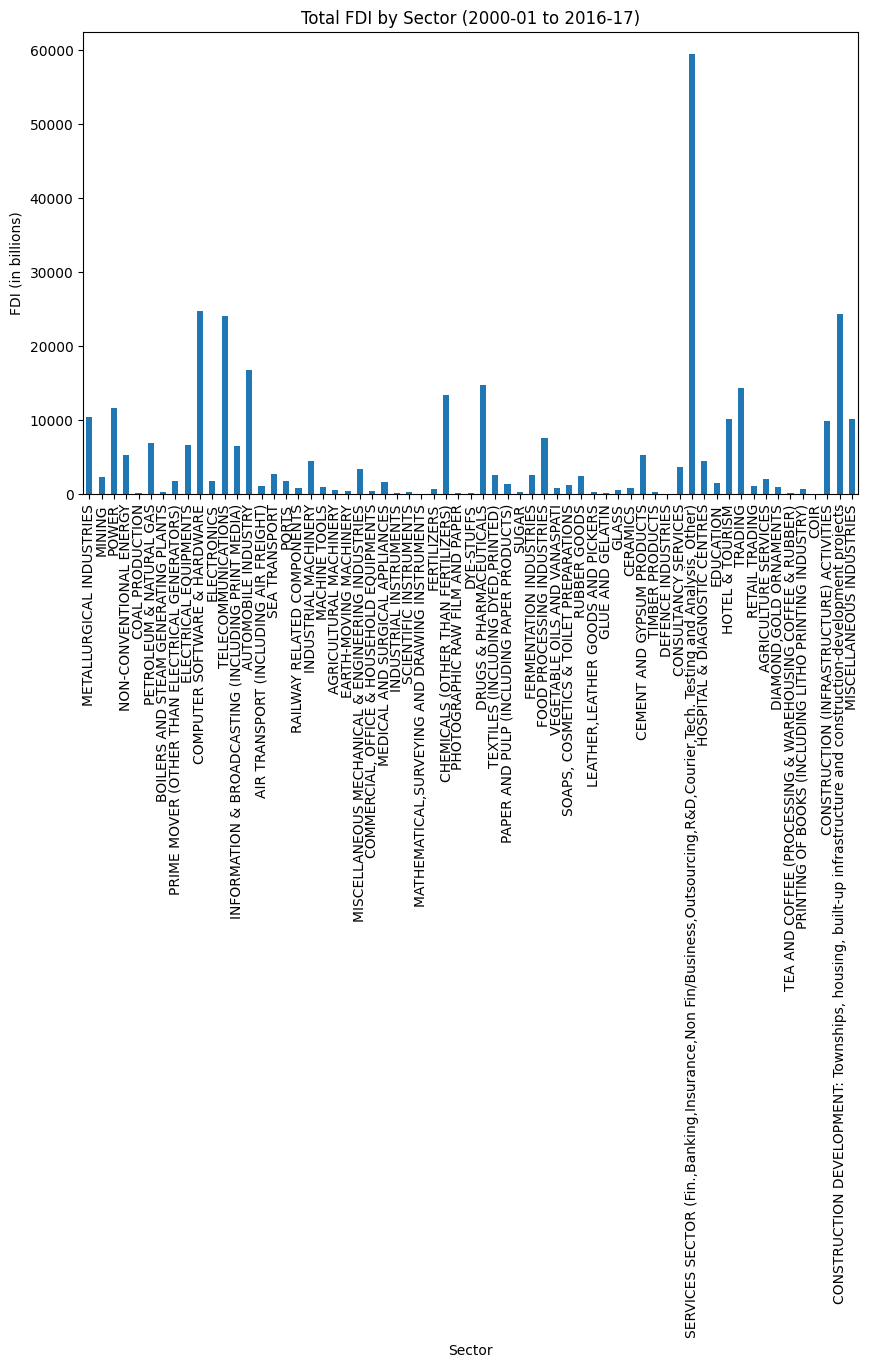

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sector_wise_fdi.plot(kind='bar')
plt.title('Total FDI by Sector (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('FDI (in billions)')
plt.xticks(rotation=90)
plt.show()

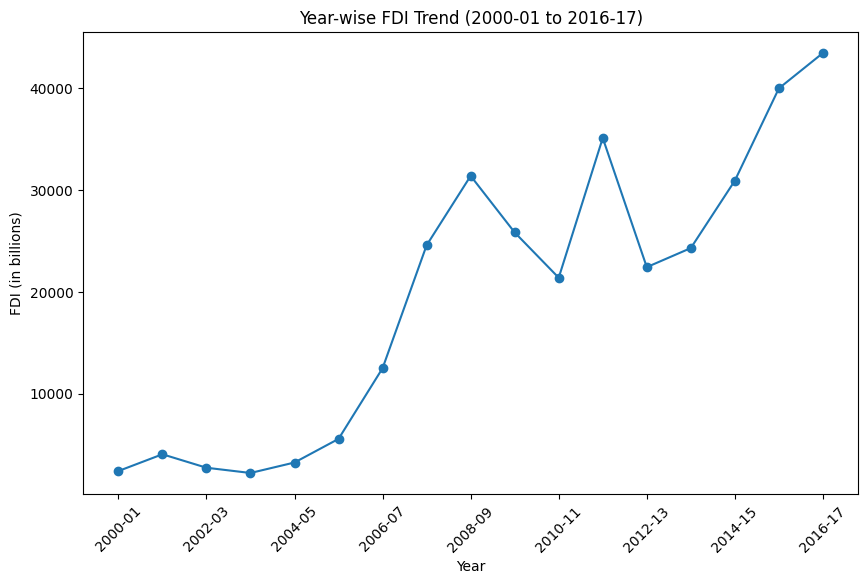

In [ ]:
plt.figure(figsize=(10, 6))
year_wise_fdi.plot(kind='line', marker='o')
plt.title('Year-wise FDI Trend (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('FDI (in billions)')
plt.xticks(rotation=45)
plt.show()

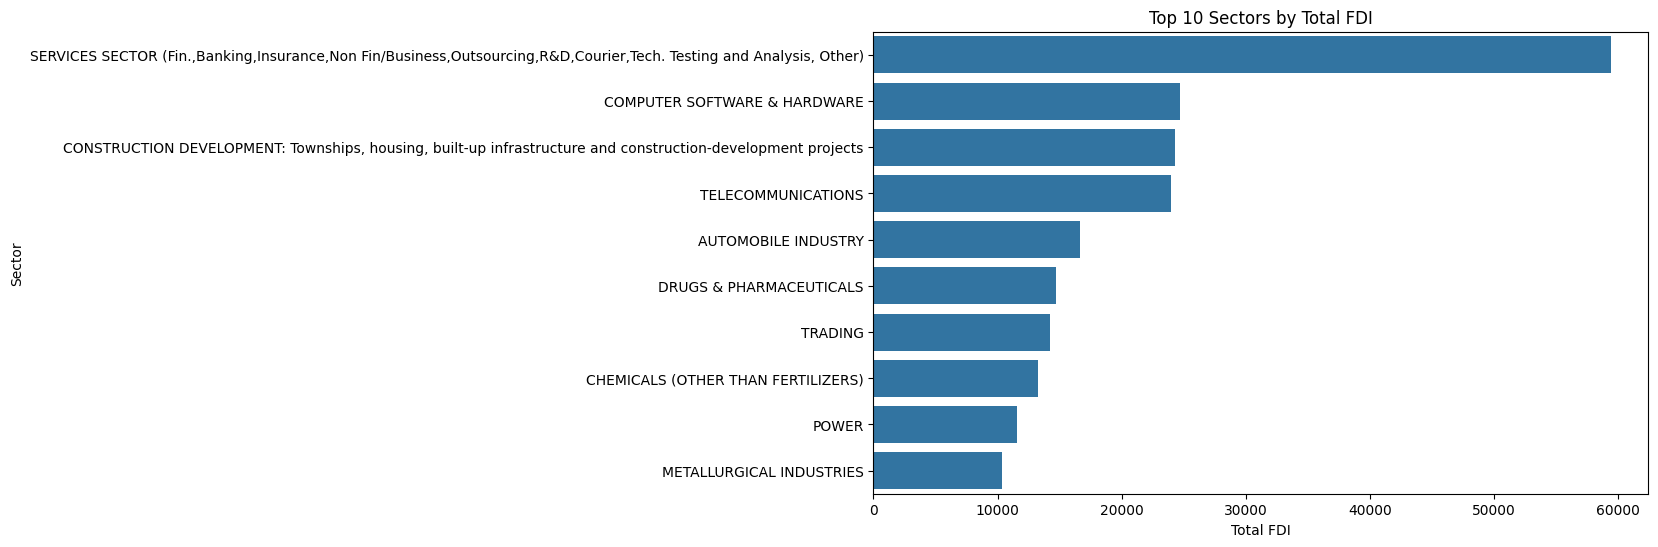

In [ ]:
df['Total_FDI'] = df.iloc[:, 1:].sum(axis=1)
top_sectors = df.nlargest(10, 'Total_FDI')
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_FDI', y='Sector', data=top_sectors)
plt.title('Top 10 Sectors by Total FDI')
plt.xlabel('Total FDI')
plt.ylabel('Sector')
plt.show()


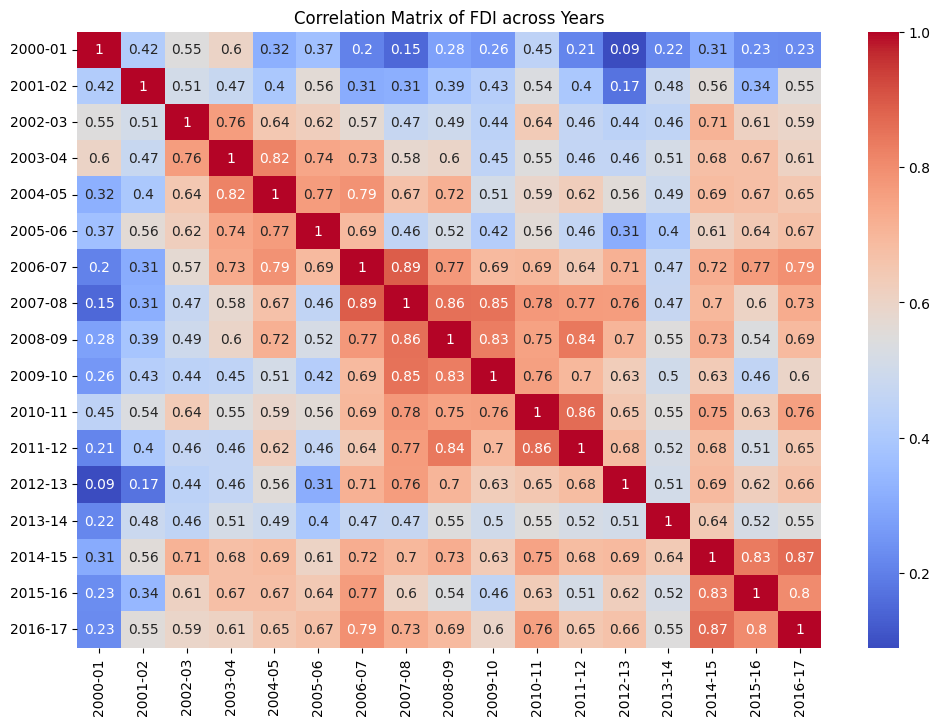

In [ ]:
# Calculate correlation between different years
# Define the year columns based on the names in your dataset
years = [col for col in df.columns if col.startswith('20')]
corr_matrix = df[years].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of FDI across Years')
plt.show()


1. **High Correlations Across Consecutive Years:**
   - High correlations (close to 1) are observed between consecutive years, such as **2014-15 and 2015-16 (0.83)**, **2015-16 and 2016-17 (0.80)**, and **2013-14 and 2014-15 (0.87)**. This suggests that FDI trends in one year are strongly influenced by the previous year's performance, indicating stability in investment patterns during those periods.

2. **Lower Correlations with Early Years:**
   - The early years, like **2000-01**, show much lower correlations with later years, particularly with **2012-13, 2013-14, and 2014-15**. For example, **2000-01 has a correlation of 0.09 with 2012-13**, indicating that the investment landscape shifted significantly over time, making early data less predictive for future years.

3. **Significant Shifts Around Economic Events:**
   - Notable economic events (such as the global financial crisis in **2008-09**) could explain the shifts in correlations. For example, the year **2008-09** shows strong correlations with **2007-08 (0.86)** and **2009-10 (0.83)**, likely reflecting the global impact of the financial crisis on FDI during that period.

4. **Medium Correlation in the Middle Years:**
   - Years like **2006-07** and **2007-08** show medium to high correlations with both previous and subsequent years, indicating that these were transitional periods where investment was somewhat consistent but starting to vary more widely as time progressed.




In [ ]:
import numpy as np
X = np.array([i for i in range(len(years))]).reshape(-1, 1)  # Independent variable (Year)
y = year_wise_fdi.values.reshape(-1, 1)  # Dependent variable (FDI values)


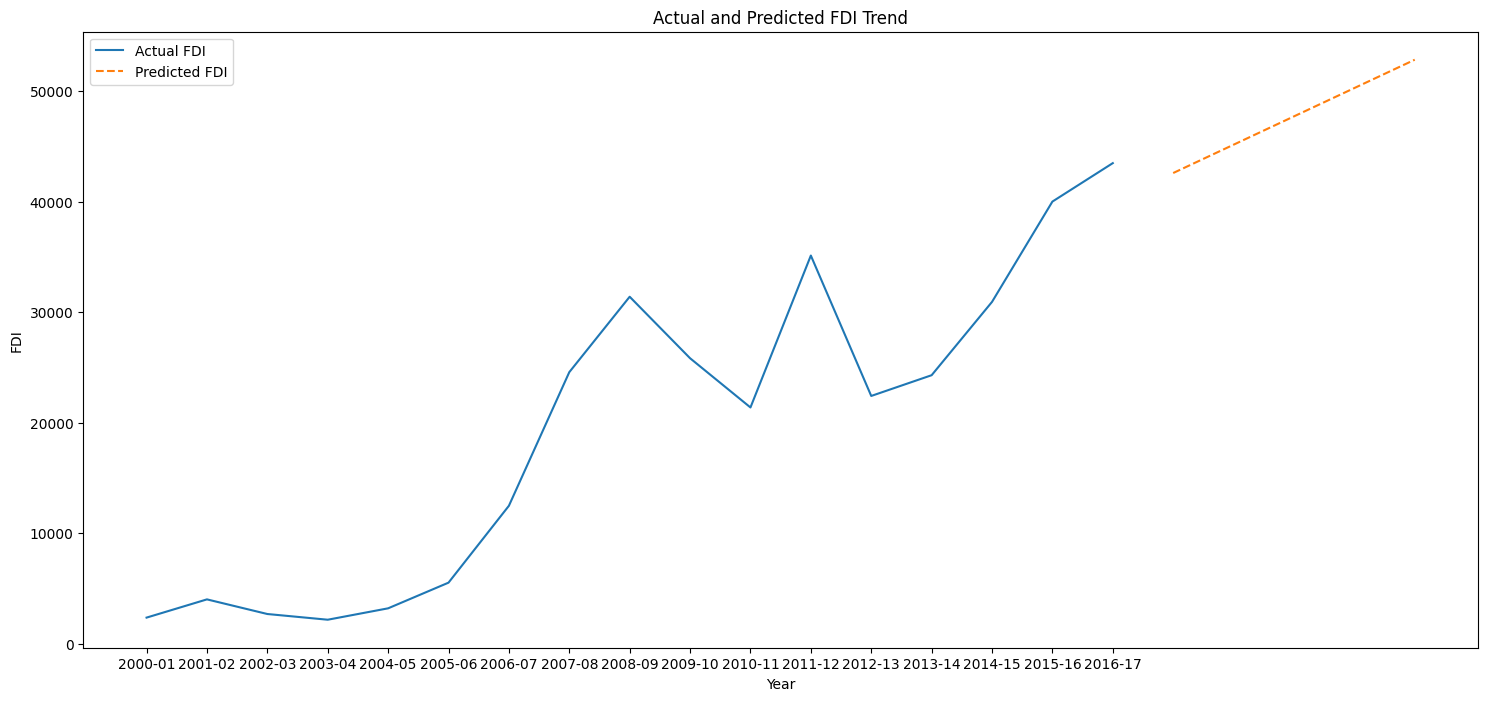

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Predict future FDI values
future_years = np.array([i for i in range(len(years), len(years) + 5)]).reshape(-1, 1)  # Predicting next 5 years
predicted_fdi = model.predict(future_years)

# Plotting the actual FDI and predicted values
plt.figure(figsize=(18, 8))
plt.plot(years,year_wise_fdi, label='Actual FDI')
plt.plot(future_years, predicted_fdi, label='Predicted FDI', linestyle='--')
plt.xlabel('Year')
plt.ylabel('FDI')
plt.title('Actual and Predicted FDI Trend')
plt.legend()
plt.show()


1. **Steady Growth in FDI Over Time:**
   - FDI values show a general upward trend from **2000-01 to 2016-17**, with some fluctuations along the way.
   - Notably, FDI starts off relatively low in the early 2000s but begins to rise sharply around **2005-06**.

2. **Fluctuations in Specific Periods:**
   - There are noticeable dips in FDI, particularly around the **2008-09** financial crisis period, which could be related to global economic challenges at that time.
   - Another dip is visible around **2011-12**, followed by a recovery.

3. **Sharp Increase Toward the End of the Actual Data:**
   - From **2013-14 onwards**, there’s a significant increase in FDI, indicating stronger investor confidence and likely more favorable policies or economic conditions in the Indian market.

4. **Predicted FDI Shows Continued Growth:**
   - The forecasted FDI (dashed orange line) suggests that FDI will continue to rise steadily after **2016-17**.
   - The model predicts consistent growth, with no anticipated sharp drops or major spikes, indicating a stable investment environment.


